In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
url ='file:///C:/Users/wtime/Desktop/팀%20타격메인기록%20_%20KBReport.html'
tables = pd.read_html(url, index_col=1) #1번째 컬럼이 인덱스다
len(tables)


2

In [35]:
tables[0]

,#,경기,승,무,패,승률,기대승률,R/G,득점,홈런,도루,볼넷%,삼진%,BABIP,타율,출루율,장타율,OPS,wOBA,WAR
팀명,,,,,,,,,,,,,,,,,,,,
SK,1.0,77,51,1,25,0.671,0.606,4.70,362,69,56,8.5,17.7,0.303,0.263,0.337,0.387,0.724,0.329,8.69
두산,2.0,78,48,0,30,0.615,0.625,5.03,392,47,52,11.3,15.5,0.313,0.273,0.361,0.390,0.751,0.346,14.22
LG,3.0,76,43,1,32,0.573,0.522,4.25,323,48,55,8.1,17.0,0.303,0.260,0.329,0.368,0.697,0.318,5.22
Hero,4.0,79,45,0,34,0.570,0.597,5.34,422,59,57,9.3,17.2,0.326,0.280,0.353,0.409,0.762,0.346,14.43
NC,5.0,76,37,0,39,0.487,0.486,4.64,353,71,37,7.7,16.9,0.318,0.279,0.343,0.419,0.762,0.342,11.71
삼성,6.0,76,33,0,43,0.434,0.480,4.66,353,68,58,8.6,18.0,0.308,0.266,0.337,0.406,0.743,0.334,10.41
KIA,7.0,76,32,1,43,0.427,0.433,4.47,340,41,50,9.5,17.0,0.317,0.269,0.345,0.381,0.726,0.333,9.65
KT,8.0,78,33,0,45,0.423,0.411,4.27,333,52,52,8.7,18.3,0.319,0.269,0.338,0.369,0.707,0.325,7.44
한화,9.0,76,31,0,45,0.408,0.443,4.45,338,51,67,9.1,21.2,0.305,0.249,0.325,0.363,0.688,0.315,4.62


In [36]:
baseball = tables[0]
baseball.shape

(11, 20)

In [38]:
data = baseball.iloc[:-1]

In [41]:
data.info() #object 점검: 승율, 기대승률 object 확인

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, SK to 롯데
Data columns (total 20 columns):
#        10 non-null float64
경기       10 non-null int64
승        10 non-null int64
무        10 non-null int64
패        10 non-null int64
승률       10 non-null object
기대승률     10 non-null object
R/G      10 non-null float64
득점       10 non-null int64
홈런       10 non-null int64
도루       10 non-null int64
볼넷%      10 non-null float64
삼진%      10 non-null float64
BABIP    10 non-null float64
타율       10 non-null float64
출루율      10 non-null float64
장타율      10 non-null float64
OPS      10 non-null float64
wOBA     10 non-null float64
WAR      10 non-null float64
dtypes: float64(11), int64(7), object(2)
memory usage: 1.6+ KB


In [51]:
data.loc[:,'승률'] = data['승률'].astype('float') #타입 변경
data.loc[:,'기대승률'] = data['기대승률'].astype('float') #타입 변경

In [49]:
data['승률'], data['기대승률']

(팀명
 SK      0.671
 두산      0.615
 LG      0.573
 Hero    0.570
 NC      0.487
 삼성      0.434
 KIA     0.427
 KT      0.423
 한화      0.408
 롯데      0.387
 Name: 승률, dtype: float64, 팀명
 SK      0.606
 두산      0.625
 LG      0.522
 Hero    0.597
 NC      0.486
 삼성      0.480
 KIA     0.433
 KT      0.411
 한화      0.443
 롯데      0.420
 Name: 기대승률, dtype: float64)

### 승리를 bar 그래프로 표현하기
### 나의 홈팀과 가장 유사한 성격의 팀을 찾아라

<BarContainer object of 10 artists>

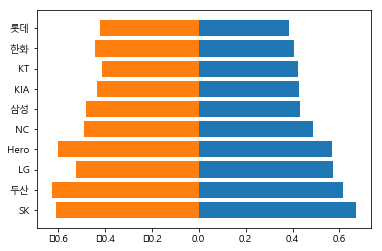

In [57]:
plt.rc('font', family='Malgun Gothic')
plt.barh(data.index, data['승률']) #bar(x,y)
plt.barh(data.index, -data['기대승률'])